In [1]:
# pip install shap

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
        classification_report, confusion_matrix, r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
) 

from sklearn.inspection import PartialDependenceDisplay, permutation_importance, partial_dependence

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.model_selection import cross_val_score

In [5]:
from category_encoders import TargetEncoder 
from sklearn.feature_selection import SelectFromModel

In [6]:
# from sklearn.datasets import make_classification

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

In [9]:
from feature_engine.imputation import CategoricalImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

In [10]:
from xgbimputer import XGBImputer

In [11]:
import tqdm as notebook_tqdm

In [12]:
import shap

In [13]:
EDA_SnapShot = pd.read_csv('../data/Joined_APACHE4a_Tables.csv')

In [14]:
EDA_SnapShot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148532 entries, 0 to 148531
Data columns (total 98 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   patientunitstayid              148532 non-null  int64  
 1   apachepatientresultsid         148532 non-null  int64  
 2   physicianspeciality            148532 non-null  object 
 3   physicianinterventioncategory  148532 non-null  object 
 4   acutephysiologyscore           148532 non-null  int64  
 5   apachescore                    148532 non-null  int64  
 6   apacheversion                  148532 non-null  object 
 7   predictedicumortality          148532 non-null  float64
 8   actualicumortality             148532 non-null  object 
 9   predictediculos                148532 non-null  float64
 10  actualiculos                   148532 non-null  float64
 11  predictedhospitalmortality     148532 non-null  float64
 12  actualhospitalmortality       

**Goal:** Predict the rank based on the total shots.

In [15]:
EDA_SnapShot

,patientunitstayid,apachepatientresultsid,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,apacheversion,predictedicumortality,actualicumortality,predictediculos,...,creatinine-2,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
0,141168,26571,critical care medicine (CCM),Unknown,49,65,IVa,0.028889,EXPIRED,3.091127,...,2.30,9,1,-1,0,5,6,4,-1.0,-1.0
1,141194,53136,critical care medicine (CCM),Unknown,57,70,IVa,0.046448,ALIVE,4.167129,...,2.51,4,1,-1,0,4,6,3,-1.0,-1.0
2,141203,8,hospitalist,I,73,90,IVa,0.291609,ALIVE,8.670299,...,0.56,4,1,-1,0,1,3,1,51.0,100.0
3,141208,53140,hospitalist,I,17,17,IVa,0.001330,ALIVE,0.444563,...,-1.00,7,1,-1,0,5,6,3,-1.0,-1.0
4,141227,138142,internal medicine,Unknown,83,100,IVa,0.335934,ALIVE,8.209624,...,1.90,6,1,-1,0,4,6,3,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,3353235,3267489,cardiology,II,30,35,IVa,0.011009,ALIVE,1.934817,...,-1.00,8,1,-1,0,5,6,4,-1.0,-1.0
148528,3353237,3246235,pulmonary/CCM,II,37,54,IVa,0.026984,ALIVE,2.566297,...,1.07,4,1,-1,0,4,6,4,-1.0,-1.0
148529,3353251,3272802,cardiology,II,142,158,IVa,0.876797,ALIVE,8.920949,...,2.43,8,1,-1,0,1,1,1,80.0,100.0
148530,3353254,3262174,hospitalist,II,18,35,IVa,0.011004,ALIVE,2.045046,...,-1.00,4,1,-1,0,5,6,4,-1.0,-1.0


In [16]:
EDA_SnapShot['actualhospitalmortality'].value_counts()

actualhospitalmortality
ALIVE      134795
EXPIRED     13737
Name: count, dtype: int64

In [17]:
EDA_SnapShot['actualicumortality'].value_counts()

actualicumortality
ALIVE      139917
EXPIRED      8615
Name: count, dtype: int64

In [18]:
EDA_SnapShot['actualhospitalmortality'] = EDA_SnapShot['actualhospitalmortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)   

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_27168/22830545.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EDA_SnapShot['actualhospitalmortality'] = EDA_SnapShot['actualhospitalmortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)


In [19]:
EDA_SnapShot['actualicumortality'] = EDA_SnapShot['actualicumortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)   

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_27168/1724647175.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  EDA_SnapShot['actualicumortality'] = EDA_SnapShot['actualicumortality'].replace({'ALIVE': 0, 'EXPIRED': 1}).astype(bool)


In [20]:
EDA_SnapShot['gender'] = EDA_SnapShot['gender'].astype('str').replace({'0': 'Female', '1': 'Male', '-1': 'Unknown'}).astype('category') 

In [21]:
EDA_SnapShot = EDA_SnapShot.drop(['patientunitstayid',
                                    'apachepatientresultsid',
                                    'apacheversion', 
                                    'apacheapsvarid', 
                                    'intubated', 
                                    'vent', 
                                    'dialysis', 
                                    'eyes', 
                                    'motor', 
                                    'verbal', 
                                    'meds', 
                                    'urine', 
                                    'wbc', 
                                    'temperature', 
                                    'respiratoryrate', 
                                    'sodium', 
                                    'heartrate', 
                                    'meanbp', 
                                    'ph', 
                                    'hematocrit', 
                                    'creatinine', 
                                    'albumin', 
                                    'pao2', 
                                    'pco2', 
                                    'bun', 
                                    'glucose', 
                                    'bilirubin', 
                                    'fio2', 'sicuday', 
                                    'saps3day1', 
                                    'saps3today', 
                                    'saps3yesterday', 
                                    'teachtype', 
                                    'region', 
                                    'managementsystem', 
                                    'var03hspxlos',
                                    'apachepredvarid',
                                    'dischargelocation'
                                  ], 
                                 axis=1)
EDA_SnapShot


,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,actualicumortality,predictediculos,actualiculos,predictedhospitalmortality,actualhospitalmortality,...,ejectfx,creatinine-2,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
0,critical care medicine (CCM),Unknown,49,65,0.028889,True,3.091127,2.4972,0.059099,True,...,-1,2.30,1,-1,0,5,6,4,-1.0,-1.0
1,critical care medicine (CCM),Unknown,57,70,0.046448,False,4.167129,3.3423,0.102283,False,...,-1,2.51,1,-1,0,4,6,3,-1.0,-1.0
2,hospitalist,I,73,90,0.291609,False,8.670299,1.2979,0.470973,False,...,-1,0.56,1,-1,0,1,3,1,51.0,100.0
3,hospitalist,I,17,17,0.001330,False,0.444563,0.5000,0.002249,False,...,-1,-1.00,1,-1,0,5,6,3,-1.0,-1.0
4,internal medicine,Unknown,83,100,0.335934,False,8.209624,1.1472,0.488562,False,...,-1,1.90,1,-1,0,4,6,3,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,cardiology,II,30,35,0.011009,False,1.934817,0.7423,0.022630,False,...,-1,-1.00,1,-1,0,5,6,4,-1.0,-1.0
148528,pulmonary/CCM,II,37,54,0.026984,False,2.566297,0.8812,0.062568,False,...,-1,1.07,1,-1,0,4,6,4,-1.0,-1.0
148529,cardiology,II,142,158,0.876797,False,8.920949,11.2909,0.918169,False,...,-1,2.43,1,-1,0,1,1,1,80.0,100.0
148530,hospitalist,II,18,35,0.011004,False,2.045046,0.2993,0.025801,False,...,-1,-1.00,1,-1,0,5,6,4,-1.0,-1.0


In [22]:
NonNumericColumns = EDA_SnapShot.select_dtypes(exclude=[np.number]).columns.tolist()
NonNumericColumns   #including boolean column(s)

['physicianspeciality',
 'physicianinterventioncategory',
 'actualicumortality',
 'actualhospitalmortality',
 'gender',
 'admitdiagnosis']

In [ ]:
EDA_SnapShot[[  'admitsource',  
                'amilocation',
                'physicianspeciality',
                'physicianinterventioncategory',
                'admitdiagnosis',
                'gender'
                ]] = EDA_SnapShot[[ 'admitsource',  
                                    'amilocation',
                                    'physicianspeciality',
                                    'physicianinterventioncategory',
                                    'admitdiagnosis',
                                    'gender'
                                    ]].astype('category')

KeyError: "['dischargelocation'] not in index"

In [ ]:
EDA_SnapShot.replace(-1, np.nan, inplace=True)   
EDA_SnapShot

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26630/3226954481.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  EDA_SnapShot.replace(-1, np.nan, inplace=True)


,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,actualicumortality,predictediculos,actualiculos,predictedhospitalmortality,actualhospitalmortality,...,creatinine-2,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
0,critical care medicine (CCM),Unknown,49.0,65.0,0.028889,True,3.091127,2.4972,0.059099,True,...,2.30,9,1,NaN,0.0,5.0,6.0,4.0,NaN,NaN
1,critical care medicine (CCM),Unknown,57.0,70.0,0.046448,False,4.167129,3.3423,0.102283,False,...,2.51,4,1,NaN,0.0,4.0,6.0,3.0,NaN,NaN
2,hospitalist,I,73.0,90.0,0.291609,False,8.670299,1.2979,0.470973,False,...,0.56,4,1,NaN,0.0,1.0,3.0,1.0,51.0,100.0
3,hospitalist,I,17.0,17.0,0.001330,False,0.444563,0.5000,0.002249,False,...,NaN,7,1,NaN,0.0,5.0,6.0,3.0,NaN,NaN
4,internal medicine,Unknown,83.0,100.0,0.335934,False,8.209624,1.1472,0.488562,False,...,1.90,6,1,NaN,0.0,4.0,6.0,3.0,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,cardiology,II,30.0,35.0,0.011009,False,1.934817,0.7423,0.022630,False,...,NaN,8,1,NaN,0.0,5.0,6.0,4.0,NaN,NaN
148528,pulmonary/CCM,II,37.0,54.0,0.026984,False,2.566297,0.8812,0.062568,False,...,1.07,4,1,NaN,0.0,4.0,6.0,4.0,NaN,NaN
148529,cardiology,II,142.0,158.0,0.876797,False,8.920949,11.2909,0.918169,False,...,2.43,8,1,NaN,0.0,1.0,1.0,1.0,80.0,100.0
148530,hospitalist,II,18.0,35.0,0.011004,False,2.045046,0.2993,0.025801,False,...,NaN,4,1,NaN,0.0,5.0,6.0,4.0,NaN,NaN


In [ ]:
EDA_SnapShot[['preopmi', 
              'preopcardiaccath', 
              'ptcawithin24h', 
              'meds-2', 
              'thrombolytics', 
              'diedinhospital', 
              'aids', 
              'hepaticfailure', 
              'lymphoma', 
              'metastaticcancer', 
              'leukemia', 
              'immunosuppression', 
              'cirrhosis', 
              'electivesurgery', 
              'activetx', 
              'readmit', 
              'ima', 
              'midur', 
              'ventday1', 
              'oobventday1', 
              'oobintubday1', 
              'diabetes', 
              'day1meds'
              ]] =  EDA_SnapShot[['preopmi', 
                                    'preopcardiaccath', 
                                    'ptcawithin24h', 
                                    'meds-2', 
                                    'thrombolytics', 
                                    'diedinhospital', 
                                    'aids', 
                                    'hepaticfailure', 
                                    'lymphoma', 
                                    'metastaticcancer', 
                                    'leukemia', 
                                    'immunosuppression', 
                                    'cirrhosis', 
                                    'electivesurgery', 
                                    'activetx', 
                                    'readmit', 
                                    'ima', 
                                    'midur', 
                                    'ventday1', 
                                    'oobventday1', 
                                    'oobintubday1', 
                                    'diabetes', 
                                    'day1meds'                                            
                                    ]].astype('bool')

In [ ]:
EDA_SnapShot.rename(columns={'meds-2':'meds', 
                             'verbal-2': 'verbal-gcs', 
                             'motor-2': 'motor-gcs', 
                             'eyes-2': 'eyes-gcs', 
                             'pao2-2': 'pao2', 
                             'fio2-2': 'fio2', 
                             'creatinine-2': 'creatinine', 
                             'day1verbal': 'day1verbal-gcs', 
                             'day1eyes': 'day1eyes-gcs', 
                             'day1motor': 'day1motor-gcs'
                             }, 
                    inplace=True)

In [ ]:
NumericColumns = EDA_SnapShot.select_dtypes(include=[np.number]).columns.tolist()
NumericColumns #excluding boolean column(s) 

['acutephysiologyscore',
 'apachescore',
 'predictedicumortality',
 'predictediculos',
 'actualiculos',
 'predictedhospitalmortality',
 'predictedhospitallos',
 'actualhospitallos',
 'unabridgedunitlos',
 'unabridgedhosplos',
 'actualventdays',
 'predventdays',
 'unabridgedactualventdays',
 'apachepredvarid',
 'bedcount',
 'graftcount',
 'verbal-gcs',
 'motor-gcs',
 'eyes-gcs',
 'age',
 'pao2',
 'fio2',
 'ejectfx',
 'creatinine',
 'visitnumber',
 'day1verbal-gcs',
 'day1motor-gcs',
 'day1eyes-gcs',
 'day1pao2',
 'day1fio2']

In [ ]:
EDA_SnapShot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148532 entries, 0 to 148531
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   physicianspeciality            148532 non-null  category
 1   physicianinterventioncategory  148532 non-null  category
 2   acutephysiologyscore           146696 non-null  float64 
 3   apachescore                    146696 non-null  float64 
 4   predictedicumortality          144045 non-null  float64 
 5   actualicumortality             148532 non-null  bool    
 6   predictediculos                144045 non-null  float64 
 7   actualiculos                   148532 non-null  float64 
 8   predictedhospitalmortality     136236 non-null  float64 
 9   actualhospitalmortality        148532 non-null  bool    
 10  predictedhospitallos           136236 non-null  float64 
 11  actualhospitallos              148532 non-null  float64 
 12  preopmi         

In [ ]:
NonNumericColumns = EDA_SnapShot.select_dtypes(exclude=[np.number]).columns.tolist()
NonNumericColumns   #including boolean column(s)

['physicianspeciality',
 'physicianinterventioncategory',
 'actualicumortality',
 'actualhospitalmortality',
 'preopmi',
 'preopcardiaccath',
 'ptcawithin24h',
 'gender',
 'admitsource',
 'meds',
 'admitdiagnosis',
 'thrombolytics',
 'diedinhospital',
 'aids',
 'hepaticfailure',
 'lymphoma',
 'metastaticcancer',
 'leukemia',
 'immunosuppression',
 'cirrhosis',
 'electivesurgery',
 'activetx',
 'readmit',
 'ima',
 'midur',
 'ventday1',
 'oobventday1',
 'oobintubday1',
 'diabetes',
 'dischargelocation',
 'amilocation',
 'day1meds']

In [ ]:
X = EDA_SnapShot.drop(columns = ['diedinhospital', 'actualhospitalmortality', 'actualicumortality']).head(118825) #  1st 80% of dataset for internal training and testing
y = EDA_SnapShot['diedinhospital'].head(118825)  #.astype('int')  #['actualhospitalmortality']['actualicumortality']

In [ ]:
X

,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,predictediculos,actualiculos,predictedhospitalmortality,predictedhospitallos,actualhospitallos,...,creatinine,dischargelocation,visitnumber,amilocation,day1meds,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
0,critical care medicine (CCM),Unknown,49.0,65.0,0.028889,3.091127,2.4972,0.059099,6.628720,2.4972,...,2.30,9,1,NaN,False,5.0,6.0,4.0,NaN,NaN
1,critical care medicine (CCM),Unknown,57.0,70.0,0.046448,4.167129,3.3423,0.102283,12.978228,9.2167,...,2.51,4,1,NaN,False,4.0,6.0,3.0,NaN,NaN
2,hospitalist,I,73.0,90.0,0.291609,8.670299,1.2979,0.470973,16.319389,3.7493,...,0.56,4,1,NaN,False,1.0,3.0,1.0,51.0,100.0
3,hospitalist,I,17.0,17.0,0.001330,0.444563,0.5000,0.002249,0.521041,0.4215,...,NaN,7,1,NaN,False,5.0,6.0,3.0,NaN,NaN
4,internal medicine,Unknown,83.0,100.0,0.335934,8.209624,1.1472,0.488562,16.508280,1.8861,...,1.90,6,1,NaN,False,4.0,6.0,3.0,65.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118820,hospitalist,I,35.0,52.0,0.046309,2.708132,1.9798,0.121628,8.145213,4.6938,...,1.06,4,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118821,hospitalist,II,52.0,57.0,0.032241,6.121565,1.3187,0.074651,16.366540,2.6090,...,1.00,4,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118822,hospitalist,I,18.0,23.0,0.003870,1.557909,0.6076,0.006764,4.829832,0.7160,...,0.90,7,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118823,hospitalist,Unknown,53.0,69.0,0.073091,4.544638,7.4083,0.144655,10.762726,7.5417,...,1.48,8,1,NaN,False,5.0,6.0,4.0,NaN,NaN


In [ ]:
y

0          True
1         False
2         False
3         False
4         False
          ...  
118820    False
118821    False
118822    False
118823    False
118824    False
Name: diedinhospital, Length: 118825, dtype: bool

In [ ]:
X.describe()

,acutephysiologyscore,apachescore,predictedicumortality,predictediculos,actualiculos,predictedhospitalmortality,predictedhospitallos,actualhospitallos,unabridgedunitlos,unabridgedhosplos,...,pao2,fio2,ejectfx,creatinine,visitnumber,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
count,117475.000000,117475.000000,1.155490e+05,115549.000000,118825.000000,109203.000000,109203.000000,118825.000000,118825.000000,118825.000000,...,26265.000000,26265.000000,2105.000000,95803.000000,118825.000000,117371.000000,117371.000000,117371.000000,26265.000000,26265.000000
mean,43.224116,55.249193,7.241851e-02,3.916336,2.958469,0.116070,10.164584,7.932683,2.958469,8.154149,...,129.756783,59.097754,50.676010,1.549578,1.068201,4.029615,5.492021,3.491868,129.756783,59.097754
std,23.272790,25.212283,1.320457e-01,2.162758,4.213053,0.162426,4.680138,8.013669,4.213053,10.612699,...,84.105098,26.353267,13.719748,1.719086,0.291075,1.531847,1.253657,0.927687,84.105098,26.353267
min,0.000000,0.000000,7.325068e-10,0.001046,0.166600,0.000447,0.043220,0.107600,0.166600,0.107600,...,15.000000,21.000000,0.000000,0.100000,1.000000,1.000000,1.000000,1.000000,15.000000,21.000000
25%,27.000000,37.000000,9.707444e-03,2.247582,0.981200,0.021939,6.934360,2.905600,0.981200,2.905600,...,76.700000,40.000000,42.000000,0.720000,1.000000,4.000000,6.000000,3.000000,76.700000,40.000000
50%,38.000000,51.000000,2.397102e-02,3.384770,1.799300,0.052786,9.502080,5.422900,1.799300,5.422900,...,102.000000,50.000000,55.000000,1.000000,1.000000,5.000000,6.000000,4.000000,102.000000,50.000000
75%,54.000000,68.000000,6.539577e-02,5.200535,3.251300,0.131339,12.480047,9.874300,3.251300,9.874300,...,151.000000,80.000000,60.000000,1.600000,1.000000,5.000000,6.000000,4.000000,151.000000,80.000000
max,198.000000,211.000000,9.746487e-01,15.079964,345.793700,0.990196,128.837248,50.000000,345.793700,731.280600,...,607.000000,100.000000,88.000000,24.950000,8.000000,5.000000,6.000000,4.000000,607.000000,100.000000


In [ ]:
X

le_y = LabelEncoder()

y_fitted = le_y.fit(y)
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 321, shuffle=True, stratify = y_encoded)


In [24]:
 

ct0 = ColumnTransformer(
        [('target_encoder', TargetEncoder(handle_unknown='ignore'), ['physicianspeciality',
                                                                        'physicianinterventioncategory',
                                                                        'preopmi',
                                                                        'preopcardiaccath',
                                                                        'ptcawithin24h',
                                                                        'gender',
                                                                        'admitsource',
                                                                        'meds',
                                                                        'admitdiagnosis',
                                                                        'thrombolytics',
                                                                        'aids',
                                                                        'hepaticfailure',
                                                                        'lymphoma',
                                                                        'metastaticcancer',
                                                                        'leukemia',
                                                                        'immunosuppression',
                                                                        'cirrhosis',
                                                                        'electivesurgery',
                                                                        'activetx',
                                                                        'readmit',
                                                                        'ima',
                                                                        'midur',
                                                                        'ventday1',
                                                                        'oobventday1',
                                                                        'oobintubday1',
                                                                        'diabetes',
                                                                        'amilocation',
                                                                        'day1meds'
                                                                        ]                                           
        )],
        remainder='passthrough')
        



xgbc_pipe = Pipeline(
    steps=[
        ('preprocessor0', ct0),
        ('StandardScaler', StandardScaler()),
        ('imputer', IterativeImputer(estimator = HistGradientBoostingRegressor(verbose=2, random_state=434), max_iter=1, random_state=343)),
        ('smote', SMOTE(random_state=344)),
        ('xgbc', XGBClassifier( enable_categorical=True, 
                                eval_metric='mlogloss',
                                objective = 'multi:softmax',
                                num_class = 2,
                                device = "cuda",
                                random_state = 535,
                                n_estimators = 100                         
                            )
        )
    ]
).fit(X_train, y_train) 

y_pred = xgbc_pipe.predict(X_test)  





NameError: name 'X_train' is not defined

In [ ]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 0.03256890385019987
RMSE: 0.18046856748530996
MAE: 0.03256890385019987
MAPE: 12696872503001.217
R2: 0.5999976079156246


In [ ]:
le_y

LabelEncoder()

In [ ]:
y_fitted

LabelEncoder()

In [ ]:
y_encoded

array([1, 0, 0, ..., 0, 0, 0], shape=(118825,))

In [ ]:
y

0          True
1         False
2         False
3         False
4         False
          ...  
118820    False
118821    False
118822    False
118823    False
118824    False
Name: diedinhospital, Length: 118825, dtype: bool

In [ ]:
accuracy_score(y_test, y_pred)

0.9674310961498002

In [ ]:
confusion_matrix(y_test, y_pred)

array([[21573,    67],
       [  707,  1418]])

In [ ]:
print(classification_report(y_test, y_pred, zero_division = 0, target_names=['Lived Through Hospitalization', 'Died While in Hospital']))

                               precision    recall  f1-score   support

Lived Through Hospitalization       0.97      1.00      0.98     21640
       Died While in Hospital       0.95      0.67      0.79      2125

                     accuracy                           0.97     23765
                    macro avg       0.96      0.83      0.88     23765
                 weighted avg       0.97      0.97      0.96     23765



# cv = LeaveOneOut()
scores = cross_val_score(xgbc_pipe, X_test, y_test, cv=10, scoring='recall_macro')

print('Cross Validation Macro Precision Scores:', scores)

### Ushering in fresh test data (previously held out) for a fresh round of testing 

In [ ]:
X_fresh_test = EDA_SnapShot.drop(columns = ['diedinhospital', 'actualhospitalmortality', 'actualicumortality']).tail(29707) # last 20% of dataset for internal training and testing
y_fresh_test = EDA_SnapShot['diedinhospital'].tail(29707)      #.astype('int')  #['actualhospitalmortality']['actualicumortality']

In [ ]:
X_fresh_test

,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,predictedicumortality,predictediculos,actualiculos,predictedhospitalmortality,predictedhospitallos,actualhospitallos,...,creatinine,dischargelocation,visitnumber,amilocation,day1meds,day1verbal-gcs,day1motor-gcs,day1eyes-gcs,day1pao2,day1fio2
118825,unknown,Unknown,46.0,63.0,0.061442,4.486235,0.6756,0.123841,10.223023,1.6847,...,1.72,4,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118826,hospitalist,II,21.0,32.0,0.011040,1.889367,1.9291,0.023112,5.529413,2.8313,...,1.08,8,1,6,False,5.0,6.0,4.0,NaN,NaN
118827,internal medicine,II,36.0,52.0,0.019024,2.955228,0.9284,0.041788,9.337471,2.0188,...,0.65,8,1,NaN,False,4.0,6.0,4.0,NaN,NaN
118828,unknown,I,63.0,76.0,0.083337,4.490110,6.2722,0.156512,15.000658,11.6500,...,2.10,4,1,NaN,False,5.0,6.0,4.0,NaN,NaN
118829,unknown,Unknown,23.0,23.0,0.014486,2.045163,6.2777,0.032374,5.857531,10.7597,...,0.91,8,1,NaN,False,5.0,6.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148527,cardiology,II,30.0,35.0,0.011009,1.934817,0.7423,0.022630,5.759009,2.6701,...,NaN,8,1,NaN,False,5.0,6.0,4.0,NaN,NaN
148528,pulmonary/CCM,II,37.0,54.0,0.026984,2.566297,0.8812,0.062568,7.565244,6.7215,...,1.07,4,1,NaN,False,4.0,6.0,4.0,NaN,NaN
148529,cardiology,II,142.0,158.0,0.876797,8.920949,11.2909,0.918169,11.222566,13.4056,...,2.43,8,1,NaN,False,1.0,1.0,1.0,80.0,100.0
148530,hospitalist,II,18.0,35.0,0.011004,2.045046,0.2993,0.025801,6.199350,4.4549,...,NaN,4,1,NaN,False,5.0,6.0,4.0,NaN,NaN


In [ ]:
y_fresh_test

118825    False
118826    False
118827    False
118828    False
118829    False
          ...  
148527    False
148528    False
148529    False
148530    False
148531    False
Name: diedinhospital, Length: 29707, dtype: bool

In [ ]:
y_fresh_pred = xgbc_pipe.predict(X_fresh_test)

In [ ]:
y_fresh_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(29707,), dtype=int32)

In [ ]:
y_fresh_test_encoded = le_y.transform(y_fresh_test)

In [ ]:
accuracy_score(y_fresh_test_encoded, y_fresh_pred)

0.9612212609822601

In [ ]:
confusion_matrix(y_fresh_test_encoded, y_fresh_pred)

array([[26333,   260],
       [  892,  2222]])

In [ ]:
print(classification_report(y_fresh_test_encoded, y_fresh_pred, zero_division = 0, target_names=['Lived Through Hospitalization', 'Died While in Hospital'])) 

                               precision    recall  f1-score   support

Lived Through Hospitalization       0.97      0.99      0.98     26593
       Died While in Hospital       0.90      0.71      0.79      3114

                     accuracy                           0.96     29707
                    macro avg       0.93      0.85      0.89     29707
                 weighted avg       0.96      0.96      0.96     29707



In [ ]:
y_fresh_test_encoded.tolist()  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y_fresh_pred.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print(f'MSE: {mean_squared_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'RMSE: {root_mean_squared_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'MAE: {mean_absolute_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'R2: {r2_score(y_fresh_test_encoded, y_fresh_pred)}') 

MSE: 0.03877873901773993
RMSE: 0.1969231804987415
MAE: 0.03877873901773993
MAPE: 39416161279036.25
R2: 0.5867381328782033


fresh_cv = LeaveOneOut()
fresh_CV_scores = cross_val_score(xgbc_pipe, X_fresh_test, y_fresh_test_encoded, cv=10, scoring='recall_macro')

print('Cross Validation Macro Precision Scores:', fresh_CV_scores)

In [ ]:
y_fresh_pred_series = pd.Series(y_fresh_pred)
y_fresh_pred_series

0        0
1        0
2        0
3        0
4        0
        ..
29702    0
29703    0
29704    0
29705    0
29706    0
Length: 29707, dtype: int32

# Top Features' Importance Quantification

In [ ]:
selection = SelectFromModel(xgbc_pipe[-1], threshold=0.0001, prefit=True)

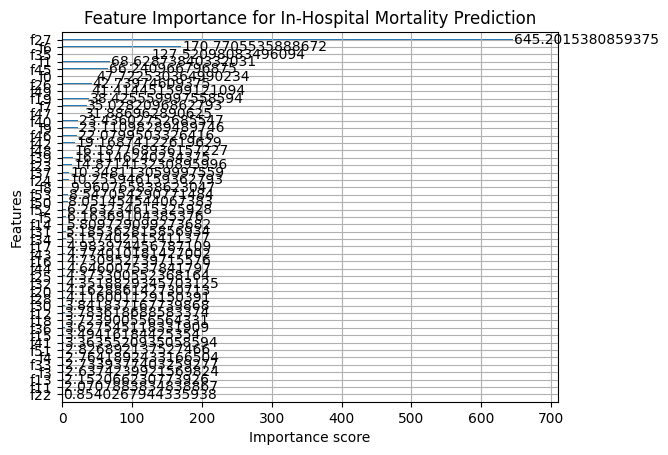

In [ ]:
plot_importance_object = plot_importance(xgbc_pipe[-1], importance_type='gain')
plt.title('Feature Importance for In-Hospital Mortality Prediction')
plt.show()

In [ ]:
X_feature_names = xgbc_pipe[:-2].get_feature_names_out()
X_feature_names

array(['target_encoder__physicianspeciality',
       'target_encoder__physicianinterventioncategory',
       'target_encoder__preopmi', 'target_encoder__preopcardiaccath',
       'target_encoder__ptcawithin24h', 'target_encoder__apachepredvarid',
       'target_encoder__gender', 'target_encoder__admitsource',
       'target_encoder__meds', 'target_encoder__admitdiagnosis',
       'target_encoder__thrombolytics', 'target_encoder__aids',
       'target_encoder__hepaticfailure', 'target_encoder__lymphoma',
       'target_encoder__metastaticcancer', 'target_encoder__leukemia',
       'target_encoder__immunosuppression', 'target_encoder__cirrhosis',
       'target_encoder__electivesurgery', 'target_encoder__activetx',
       'target_encoder__readmit', 'target_encoder__ima',
       'target_encoder__midur', 'target_encoder__ventday1',
       'target_encoder__oobventday1', 'target_encoder__oobintubday1',
       'target_encoder__diabetes', 'target_encoder__dischargelocation',
       'target_enc

In [ ]:
importances = xgbc_pipe[-1].feature_importances_

In [ ]:
importance_df = pd.DataFrame({'Feature': X_feature_names, 'Importance': importances})   

In [ ]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df = importance_df[importance_df['Importance'] > 0]

importance_df.head(30)

,Feature,Importance
27,target_encoder__dischargelocation,0.403174
6,target_encoder__gender,0.106711
35,remainder__predictedhospitalmortality,0.079685
1,target_encoder__physicianinterventioncategory,0.042885
45,remainder__verbal-gcs,0.041393
0,target_encoder__physicianspeciality,0.029821
26,target_encoder__diabetes,0.026707
49,remainder__pao2,0.025879
19,target_encoder__activetx,0.024011
7,target_encoder__admitsource,0.021888


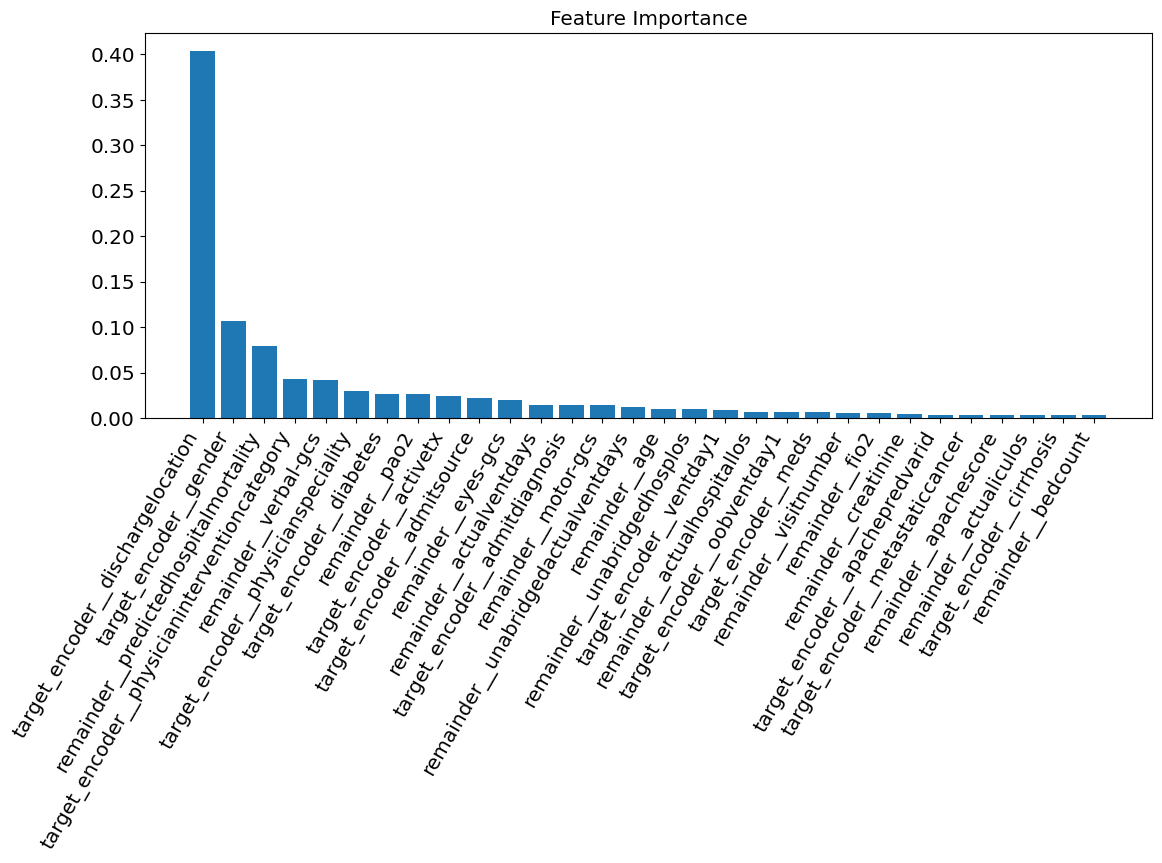

In [ ]:
FeatureImportance_BarGraph = pd.DataFrame(zip(xgbc_pipe[:-2].get_feature_names_out(), xgbc_pipe[-1].feature_importances_)).sort_values(1, ascending = False).head(30) #.T
plt.figure(figsize = (13, 5))
plt.bar(FeatureImportance_BarGraph[0], FeatureImportance_BarGraph[1])
plt.xticks(rotation = 60, ha = 'right', size = 'x-large')
plt.yticks(size = 'x-large')
plt.title('Feature Importance', size = 'x-large')
plt.savefig('./visualizations/feature_importance.jpg', bbox_inches = 'tight');

# SHAP

In [ ]:
xgbc_pipe_XGBClassifier = xgbc_pipe[:-2]
xgbc_pipe_XGBClassifier

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor0',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encoder',
                                                  TargetEncoder(handle_unknown='ignore'),
                                                  ['physicianspeciality',
                                                   'physicianinterventioncategory',
                                                   'preopmi',
                                                   'preopcardiaccath',
                                                   'ptcawithin24h',
                                                   'apachepredvarid', 'gender',
                                                   'admitsource', 'meds',
                                                   'admitdiagnosis',
                                                   'thrombolytics', 'aids',
                                                   'hepaticfailure'...
                                                   'leukemia',
                                                   'immunosuppression',
                                                   'cirrhosis',
                                                   'electivesurgery',
                                                   'activetx', 'readmit', 'ima',
                                                   'midur', 'ventday1',
                                                   'oobventday1',
                                                   'oobintubday1', 'diabetes',
                                                   'dischargelocation',
                                                   'amilocation',
                                                   'day1meds'])])),
                ('StandardScaler', StandardScaler()),
                ('imputer',
                 IterativeImputer(estimator=HistGradientBoostingRegressor(random_state=434,
                                                                          verbose=2),
                                  max_iter=1, random_state=343))])

In [ ]:
X_fresh_test_transformed_SHAP = xgbc_pipe_XGBClassifier.transform(X_fresh_test)
X_fresh_test_transformed_SHAP  


array([[-2.82805111e-02, -4.42282276e-01, -5.27724136e-02, ...,
         5.47622001e-01,  1.03880037e-04, -2.89190541e-03],
       [ 1.68830182e-01,  8.58304910e-01, -5.27724136e-02, ...,
         5.47622001e-01,  2.04000053e-04, -4.72165262e-03],
       [-3.67793885e-02,  8.58304910e-01, -5.27724136e-02, ...,
         5.47622001e-01,  1.03880037e-04, -3.31630639e-03],
       ...,
       [-1.38833680e+00,  8.58304910e-01, -5.27724136e-02, ...,
        -2.68553196e+00, -5.92845465e-01,  1.54746838e+00],
       [ 1.68830182e-01,  8.58304910e-01, -5.27724136e-02, ...,
         5.47622001e-01,  1.03880037e-04, -3.04390035e-03],
       [ 1.14309695e+00,  8.58304910e-01, -5.27724136e-02, ...,
         5.47622001e-01,  8.58603329e-06, -4.08370493e-03]],
      shape=(29707, 59))

In [ ]:
explainer = shap.TreeExplainer(xgbc_pipe[4])
explanation = explainer(xgbc_pipe[:-2].transform(X_fresh_test))

In [ ]:
explainer.shap_values(xgbc_pipe[:-2].transform(X_fresh_test))

array([[[ 0.39650038, -0.39650038],
        [ 0.20028009, -0.20028009],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.29499373, -0.2949938 ],
        [ 0.06844521, -0.06844518],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.22688663, -0.22688666],
        [ 0.11790303, -0.11790301],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.30359843, -0.30359843],
        [ 0.15935336, -0.15935335],
        [ 0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.18145026, -0.18145032],
        [ 0.13110352, -0.13

In [ ]:
explanation[:,:,1]

.values =
array([[-0.39650038, -0.20028009,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2949938 , -0.06844518,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22688666, -0.11790301,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.30359843, -0.15935335,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.18145032, -0.1311035 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00845007, -0.16610147,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(29707, 59), dtype=float32)

.base_values =
array([0.526052, 0.526052, 0.526052, ..., 0.526052, 0.526052, 0.526052],
      shape=(29707,), dtype=float32)

.data =
array([[-2.82805111e-02, -4.42282276e-01, -5.27724136e-02, ...,
         5.47622001e-01,  1.03880037e-04, -2.89190541e-03],
       [ 1.68830182e-01,  8.58304910e-01, -5.27724136e-02, ...,
         5.47622001e

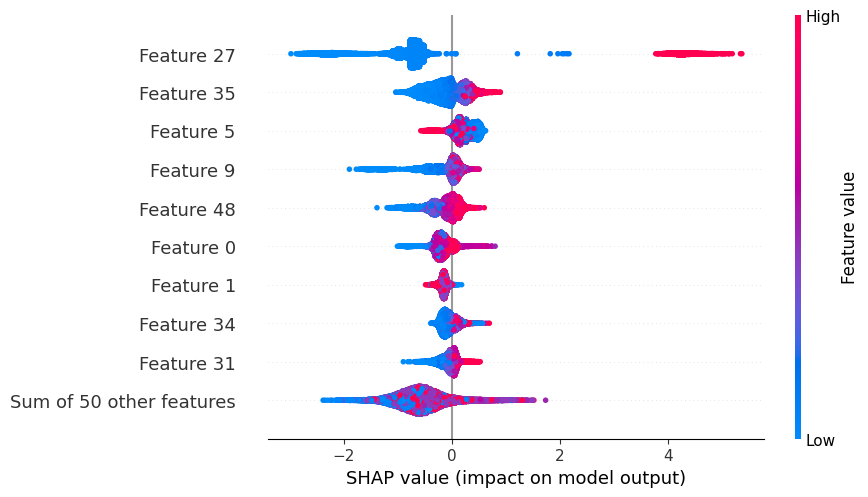

In [ ]:
shap.plots.beeswarm(explanation[:,:,1])

In [ ]:
xgbc_pipe[:-1].get_feature_names_out()[[27, 35, 5, 9, 48, 0, 1, 34, 31]].tolist()   # when n_estimators = 100

['target_encoder__dischargelocation',
 'remainder__predictedhospitalmortality',
 'target_encoder__apachepredvarid',
 'target_encoder__admitdiagnosis',
 'remainder__age',
 'target_encoder__physicianspeciality',
 'target_encoder__physicianinterventioncategory',
 'remainder__actualiculos',
 'remainder__apachescore']

In [ ]:
pd.DataFrame({'dischargelocation': X_fresh_test['dischargelocation'], 'SHAP_value':explanation[:,:,1].values[:,0]}).groupby('dischargelocation')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0]

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26630/3097879919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'dischargelocation': X_fresh_test['dischargelocation'], 'SHAP_value':explanation[:,:,1].values[:,0]}).groupby('dischargelocation')['SHAP_value'].mean().sort_values(ascending = False) #[lambda x: x > 0]


dischargelocation
9   -0.107382
5   -0.164725
7   -0.167408
4   -0.169612
8   -0.179959
6   -0.182833
Name: SHAP_value, dtype: float32

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_26630/2146478050.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'dischargelocation': X_fresh_test['dischargelocation'], 'SHAP_value':explanation[:,:,1].values[:,0]}).groupby('dischargelocation')['SHAP_value'].mean().sort_values(ascending = False)[lambda x: x > 0].head(10).plot(kind = 'bar')


IndexError: index 0 is out of bounds for axis 0 with size 0

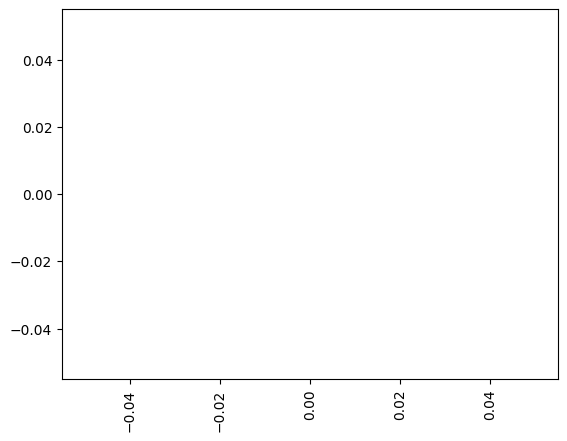

In [ ]:
pd.DataFrame({'dischargelocation': X_fresh_test['dischargelocation'], 'SHAP_value':explanation[:,:,1].values[:,0]}).groupby('dischargelocation')['SHAP_value'].mean().sort_values(ascending = False)[lambda x: x > 0].head(10).plot(kind = 'bar')

In [ ]:
pd.DataFrame({'LampStatus': X_fresh_test['LampStatus'], 'SHAP_value':explanation[:,:,1].values[:,2]}).groupby('LampStatus')['SHAP_value'].mean().sort_values(ascending = False) #.plot(kind = 'bar') #[lambda x: x > 0]

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_39057/4279101998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'LampStatus': X_fresh_test['LampStatus'], 'SHAP_value':explanation[:,:,1].values[:,2]}).groupby('LampStatus')['SHAP_value'].mean().sort_values(ascending = False)#[lambda x: x > 0]


LampStatus
18431.0    0.439509
28436.0    0.292249
17407.0    0.115410
18419.0    0.113853
50175.0    0.035880
51199.0   -0.005783
22527.0   -0.009539
6143.0    -0.039411
55295.0   -0.052528
5119.0    -0.075944
2047.0    -0.082137
21503.0   -0.129135
63487.0   -0.130944
11801.0   -0.134680
65535.0   -0.168823
255.0     -0.211344
1279.0    -0.240234
62463.0   -1.026609
1023.0    -1.203026
2035.0    -1.303584
Name: SHAP_value, dtype: float32

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_39057/3735487212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'LampStatus': X_fresh_test['LampStatus'], 'SHAP_value':explanation[:,:,1].values[:,2]}).groupby('LampStatus')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')


<Axes: xlabel='LampStatus'>

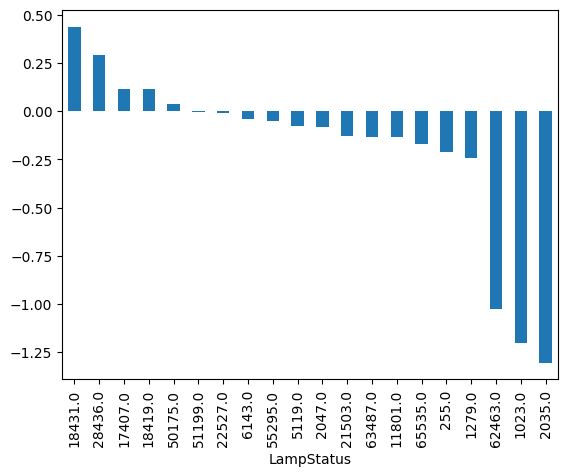

In [ ]:
pd.DataFrame({'LampStatus': X_fresh_test['LampStatus'], 'SHAP_value':explanation[:,:,1].values[:,2]}).groupby('LampStatus')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
explanation[:,:,1][0].values[0]

np.float32(0.1997289)

In [ ]:
import seaborn as sns

In [ ]:
FuelLevel_Exploration = pd.DataFrame({'FuelLevel': X_fresh_test['FuelLevel'], 'SHAP_value':explanation[:,:,1].values[:,4]})

<Axes: xlabel='FuelLevel', ylabel='SHAP_value'>

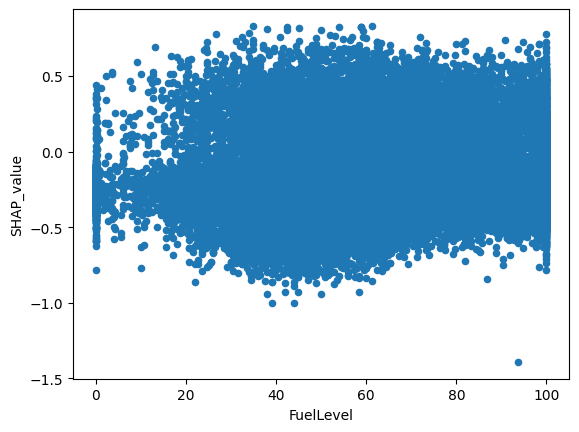

In [ ]:
pd.DataFrame({'FuelLevel': X_fresh_test['FuelLevel'], 'SHAP_value':explanation[:,:,1].values[:,4]}).plot(kind = 'scatter', x='FuelLevel', y='SHAP_value')

<Axes: xlabel='FuelLevel', ylabel='SHAP_value'>

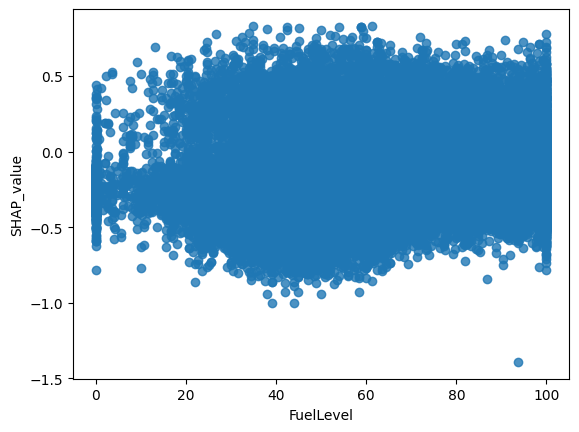

In [ ]:
sns.regplot(data = FuelLevel_Exploration, x='FuelLevel', y='SHAP_value')

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_39057/2312108474.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame({'ecuSource': X_fresh_test['ecuSource'], 'SHAP_value':explanation[:,:,1].values[:,1]}).groupby('ecuSource')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')


<Axes: xlabel='ecuSource'>

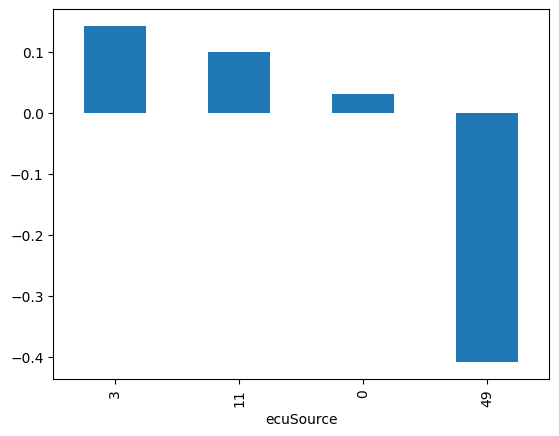

In [ ]:
pd.DataFrame({'ecuSource': X_fresh_test['ecuSource'], 'SHAP_value':explanation[:,:,1].values[:,1]}).groupby('ecuSource')['SHAP_value'].mean().sort_values(ascending = False).plot(kind = 'bar')

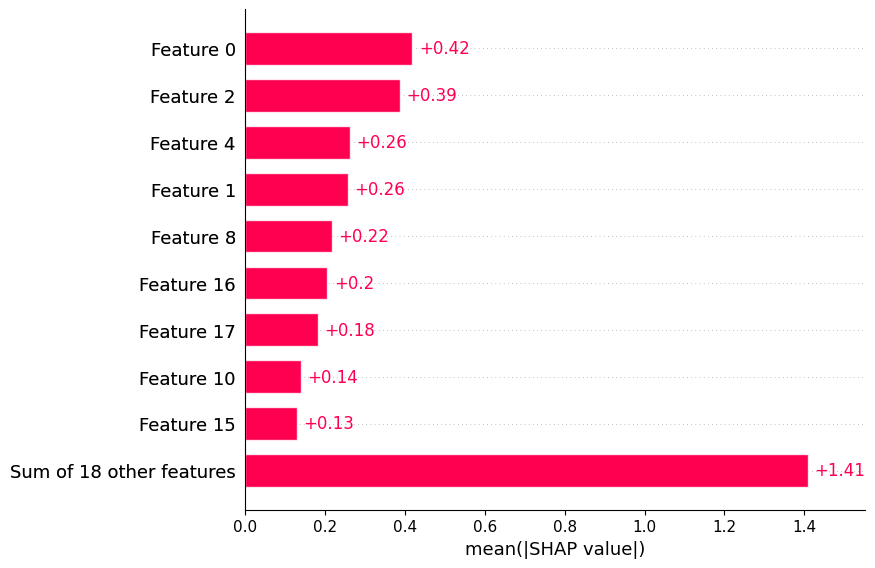

In [ ]:
shap.plots.bar(explanation[:,:,1])

feature_names = xgbc_pipe[:-1].get_feature_names_out(input_features=X_fresh_test.columns)
feature_names

df_SHAP = pd.DataFrame(X_fresh_test_transformed_SHAP, columns=feature_names)
df_SHAP

In [ ]:
xgbc_pipe[:-1].get_feature_names_out()[[0, 2, 16, 1, 8, 17, 3, 22, 7]].tolist()

['target_encoder__spn_fmi',
 'target_encoder__LampStatus',
 'remainder__FuelLevel',
 'target_encoder__ecuSource',
 'remainder__CruiseControlSetSpeed',
 'remainder__FuelLtd',
 'remainder__active',
 'remainder__ParkingBrake',
 'remainder__CruiseControlActive']

In [ ]:
xgbc_pipe[:-1].get_feature_names_out()

array(['target_encoder__spn_fmi', 'target_encoder__ecuSource',
       'target_encoder__LampStatus', 'remainder__active',
       'remainder__activeTransitionCount', 'remainder__AcceleratorPedal',
       'remainder__BarometricPressure', 'remainder__CruiseControlActive',
       'remainder__CruiseControlSetSpeed', 'remainder__DistanceLtd',
       'remainder__EngineCoolantTemperature', 'remainder__EngineLoad',
       'remainder__EngineOilPressure', 'remainder__EngineOilTemperature',
       'remainder__EngineRpm', 'remainder__EngineTimeLtd',
       'remainder__FuelLevel', 'remainder__FuelLtd',
       'remainder__FuelRate', 'remainder__FuelTemperature',
       'remainder__IgnStatus', 'remainder__IntakeManifoldTemperature',
       'remainder__ParkingBrake', 'remainder__Speed',
       'remainder__SwitchedBatteryVoltage', 'remainder__Throttle',
       'remainder__TurboBoostPressure'], dtype=object)

# Top Features' Importance Quantification

In [ ]:
selection = SelectFromModel(xgbc_pipe[4], threshold=0.0001, prefit=True)

In [ ]:
X_selected = selection.transform(X_train) # xgbc_pipe[:-1].get_feature_names_out()
X_selected

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[0, 1.0, 11, ..., 0.0, 11.02, '97_15'],
       [49, 1.0, 126, ..., 100.0, 0.29, '829_3'],
       [11, 0.0, 127, ..., nan, nan, '1068_2'],
       ...,
       [49, 0.0, 126, ..., nan, nan, '929_9'],
       [49, 0.0, 126, ..., nan, nan, '929_9'],
       [49, 1.0, 126, ..., 0.0, 0.58, '929_9']],
      shape=(948578, 27), dtype=object)

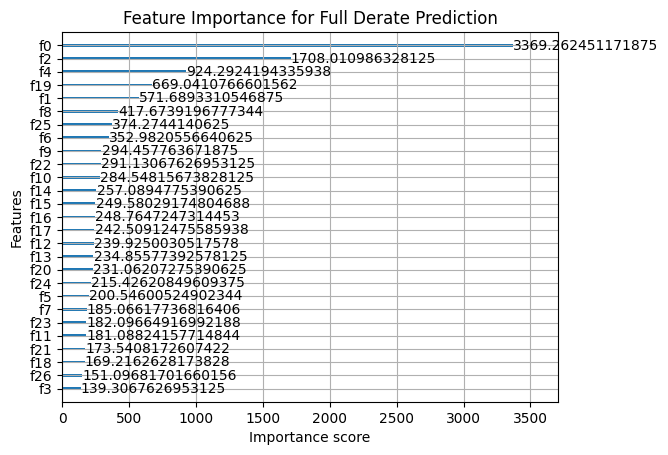

In [ ]:
plot_importance_object = plot_importance(xgbc_pipe[4], importance_type='gain')
plt.title('Feature Importance for Full Derate Prediction')
plt.show()

In [ ]:
feature_importances = xgbc_pipe[4].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': xgbc_pipe[:-1].get_feature_names_out(), 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_27_features = feature_importance_df.head(27)

print(top_27_features)

                                 Feature  Importance
0                target_encoder__spn_fmi    0.268285
2             target_encoder__LampStatus    0.136004
4       remainder__activeTransitionCount    0.073599
19            remainder__FuelTemperature    0.053274
1              target_encoder__ecuSource    0.045522
8       remainder__CruiseControlSetSpeed    0.033258
25                   remainder__Throttle    0.029802
6          remainder__BarometricPressure    0.028107
9                 remainder__DistanceLtd    0.023447
22               remainder__ParkingBrake    0.023182
10   remainder__EngineCoolantTemperature    0.022658
14                  remainder__EngineRpm    0.020471
15              remainder__EngineTimeLtd    0.019873
16                  remainder__FuelLevel    0.019808
17                    remainder__FuelLtd    0.019310
12          remainder__EngineOilPressure    0.019105
13       remainder__EngineOilTemperature    0.018701
20                  remainder__IgnStatus    0.

In [ ]:
print("Top 27 features:", top_27_features['Feature'].tolist())

Top 27 features: ['target_encoder__spn_fmi', 'target_encoder__LampStatus', 'remainder__activeTransitionCount', 'target_encoder__ecuSource', 'remainder__IgnStatus', 'remainder__EngineOilPressure', 'remainder__active', 'remainder__SwitchedBatteryVoltage', 'remainder__CruiseControlSetSpeed', 'remainder__DistanceLtd', 'remainder__FuelTemperature', 'remainder__BarometricPressure', 'remainder__EngineTimeLtd', 'remainder__FuelLtd', 'remainder__EngineCoolantTemperature', 'remainder__ParkingBrake', 'remainder__Throttle', 'remainder__Speed', 'remainder__EngineOilTemperature', 'remainder__TurboBoostPressure', 'remainder__FuelLevel', 'remainder__EngineRpm', 'remainder__EngineLoad', 'remainder__AcceleratorPedal', 'remainder__FuelRate', 'remainder__IntakeManifoldTemperature', 'remainder__CruiseControlActive']
